# Séance 4: Apprentissage superviser Classification RL,KNN, Evaluation

Glossaire
-------
* __système expert :__ un classificateur qui effectue la même tâche qu'un « expert », c'est-à-dire identifier les courriers indésirables, les oiseaux ou les documents.
* __Feature (fonctionnalité ou Variable Independate) :__ un attribut/champ du point de données. Pensez à une colonne dans une base de données. Si un mot de notre lexique est présent ou non dans un article.
* __instance :__ un point de données, une collection ou un vecteur de __fonctionnalités__. Pensez à une ligne dans une base de données. Un article entier et les mots qu'il contient.
* __Classe (Variable cible ou variable dependante) :__ l'étiquette que nous essayons de classer/prédire pour une __instance__. Le fait qu'un étudiant ait répondu correctement à une question.
* __TrainingSet (ensemble de données d'entraînement):__ une collection d'__instances__ pré-étiquetées (nous savons à quelle classe elles appartiennent) utilisées pour construire le __modèle__. Une collection de questions d'étudiants dont nous savons s'ils ont répondu correctement.
* __training example (exemple d'entraînement) :__ une __instance__ de l'ensemble d'entraînement.
* __target variable (variable cible) :__ la __fonctionnalité__ que nous voulons prédire pour toutes nos __instances__ non étiquetées. La __classe__ est la valeur de la __variable cible__. La __variable cible__ est le _résultat de la question (correct/non correct)_. (Attention lorsque vous appelez la __variable cible__ une __fonctionnalité__, certaines personnes peuvent ne pas être d'accord sur ce point)
* __TestSet (ensemble de tests) :__ une collection d'__instances__ pré-étiquetées utilisées pour évaluer notre __prédicteur__. Nous prétendons ne pas connaître la __variable cible__ et exécutons ces instances via le __prédicteur__ en comparant la __classe__ réelle avec ce que le __modèle__ a attribué.
* __nominal value (valeur nominale) :__ une chaîne ou un nombre discret. Domaine fini de valeurs possibles. c'est-à-dire des sections du NYT
* __continuous value (valeur continue) :__ une valeur continue ;) très certainement un nombre. Réel ou entier. Domaine infini de valeurs possibles. c'est-à-dire la température (puisqu'elle peut être arbitrairement précise)
* __model :__ structure de données résultant de l'entraînement de l'algorithme. Nous pouvons considérer cela comme une fonction. Prend en entrée une __instance__ et génère une __class__ pour la __variable cible__
* __knowledge representation :__ structure de données codant les informations sur ce que l'algorithme a appris. Peut être un ensemble de règles, de probabilités, un arbre ou une fonction. Parfois, la __knowledge representation__ est plus importante que le __model__ ou la prédiction elle-même, c'est-à-dire les nœuds/splits de l'arbre de décision.

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importation de Dataset Iris

In [2]:
data = pd.read_csv("IRIS.csv")

# Affichage des 5 premières lignes de dataset

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data['species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

Dans cet ensemble de données, nous travaillerons sur la colonne Espèce, elle comptera le nombre de fois qu'une espèce particulière est apparue.

In [5]:
data["species"].value_counts() 

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

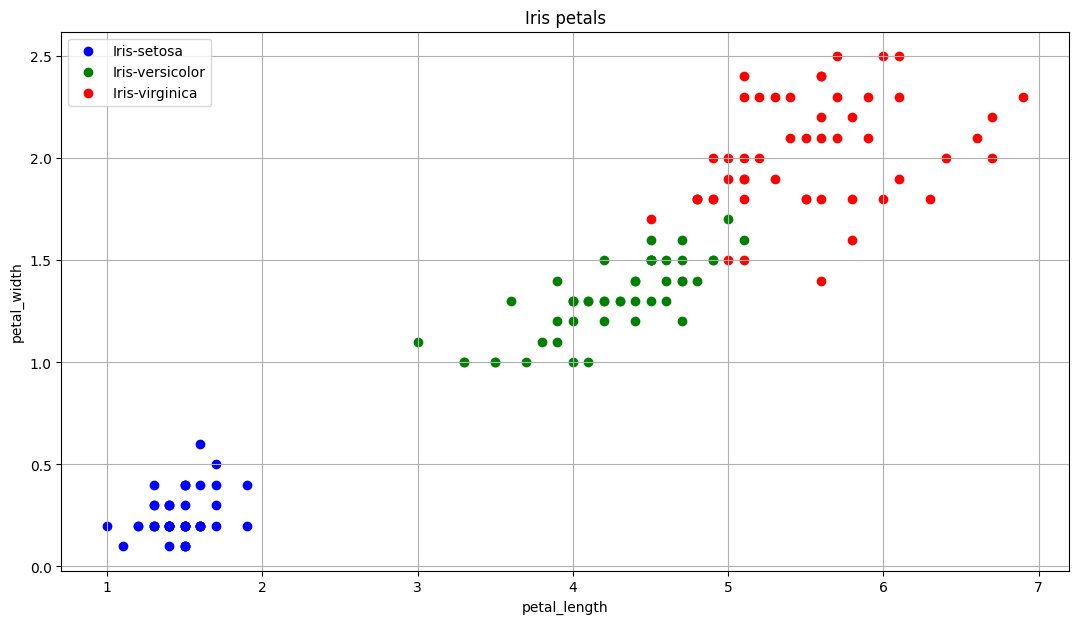

In [6]:
import matplotlib.pyplot as plt

setosa = data[data.species == "Iris-setosa"]
versicolor = data[data.species=='Iris-versicolor']
virginica = data[data.species=='Iris-virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot

# lables and scatter points
ax.scatter(setosa['petal_length'], setosa['petal_width'], label="Iris-setosa", facecolor="blue")
ax.scatter(versicolor['petal_length'], versicolor['petal_width'], label="Iris-versicolor", facecolor="green")
ax.scatter(virginica['petal_length'], virginica['petal_width'], label="Iris-virginica ", facecolor="red")


ax.set_xlabel("petal_length")
ax.set_ylabel("petal_width")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

In [7]:
#data['species'] = data['species'].replace({0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'})
#data

# Affichage des noms des variables(Features)

In [8]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

# Affichage des nombres de ligne et de colonne

In [9]:
data.shape

(150, 5)

# Affichage des types de données pour chaque features.

In [10]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

# Comptage de nombre de valeurs uniques présentes dans une colonne ou une ligne spécifique d'un DataFrame.

In [11]:
data.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

# Résumé des valeurs manquantes

In [12]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Voir les lignes avec des valeurs manquantes

In [13]:
data[data.isnull().any(axis=1)]

,sepal_length,sepal_width,petal_length,petal_width,species


# Affichage des statistiques de données

In [14]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
data['species'] = data['species'].replace({'Iris_setosa': 1, 'Iris_virginica': 2, 'Iris_versicolor': 3})

In [16]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Convespecies valeur catégorielle en valeur discrète, pour la colonne species

**Importer LabelEncoder**

In [17]:
from sklearn import preprocessing
#création de labelEncoder
le = preprocessing.LabelEncoder()

In [18]:
# Conversion des texte en nombres.
data.species = le.fit_transform(data.species)

In [19]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [20]:
from sklearn.model_selection import train_test_split

# Droping the target and species since we only need the measurements
X = data.drop(['species'], axis=1)

# converting into numpy array and assigning petal length and petal width
X = X.to_numpy()[:, (2,3)]
y = data['species']

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=42)

# Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)


LogisticRegression()

# Training predictions

In [111]:
training_prediction = log_reg.predict(X_train)
training_prediction

array([1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 1, 0,
       0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1,
       1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1,
       1, 2, 2, 0, 1, 1, 0, 1, 2])

# Test predictions

In [112]:
test_prediction = log_reg.predict(X_test)
test_prediction

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0,
       1, 2, 0, 1, 2, 0, 2, 2, 1])

# Performance Measures
Performance measures are used to evaluate the effectiveness of classifiers on different datasets with different characteristics. For classification problems, there are three main measures for evaluating the model, the precision(the accuracy of positive predictions or the number of most relevant values from retrieved values.), Recall(ratio of positive instances that are truly detected by the classifier), and confusion matrix.

**Performance in training**

In [113]:
from sklearn import metrics

print("Precision, Recall, Confusion matrix, in training\n")

# Precision Recall scores
print(metrics.classification_report(y_train, training_prediction, digits=3))

# Confusion matrix
print(metrics.confusion_matrix(y_train, training_prediction))


Precision, Recall, Confusion matrix, in training

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        21
           1      0.923     0.889     0.906        27
           2      0.893     0.926     0.909        27

    accuracy                          0.933        75
   macro avg      0.939     0.938     0.938        75
weighted avg      0.934     0.933     0.933        75

[[21  0  0]
 [ 0 24  3]
 [ 0  2 25]]


# Performance in testing

In [114]:
print("Precision, Recall, Confusion matrix, in testing\n")

# Precision Recall scores
print(metrics.classification_report(y_test, test_prediction, digits=3))

# Confusion matrix
print(metrics.confusion_matrix(y_test, test_prediction))


Precision, Recall, Confusion matrix, in testing

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        29
           1      1.000     1.000     1.000        23
           2      1.000     1.000     1.000        23

    accuracy                          1.000        75
   macro avg      1.000     1.000     1.000        75
weighted avg      1.000     1.000     1.000        75

[[29  0  0]
 [ 0 23  0]
 [ 0  0 23]]
